# Inverse of a lower triangular matrix $L$

## Equations for each element of $L^{-1} = [q_{ii}]$

$
\begin{equation}
\begin{bmatrix}
    q_{11}&      0&     0 \\
    q_{21}& q_{22}&     0 \\
    q_{31}& q_{32}& q_{33}
\end{bmatrix}
\times
\begin{bmatrix}
    l_{11}&      0&     0 \\
    l_{21}& l_{22}&     0 \\
    l_{31}& l_{32}& l_{33}
\end{bmatrix}
=
\begin{bmatrix}
    1& 0& 0 \\
    0& 1& 0 \\
    0& 0& 1
\end{bmatrix}
\end{equation}
$

Therefore,

$
\begin{equation}
L^{-1} = 
\begin{bmatrix}
    l_{11}^{-1}&      0&     0 \\
    -q_{22} l_{21} l_{11}^{-1}& l_{22}^{-1}&     0 \\
    -(q_{33}l_{31}+q_{32}l_{21}) l_{11}^{-1}& -q_{33}l_{32} l_{22}^{-1}& l_{33}^{-1}
\end{bmatrix}
=
\begin{bmatrix}
    l_{11}^{-1}&      0&     0 \\
    -l_{21} l_{22}^{-1} l_{11}^{-1}& l_{22}^{-1}&     0 \\
    -(-l_{21}l_{32}l_{33}^{-1} l_{22}^{-1}+l_{31}l_{33}^{-1}) l_{11}^{-1}& -l_{32}l_{33}^{-1} l_{22}^{-1}& l_{33}^{-1}
\end{bmatrix}
\end{equation}
$

In [1]:
function lowertriangularinverse(l)
    q = zeros(size(l))
    for i in 1:size(l,1)
        q[i,i] = 1/l[i,i]                               # diagonal element
        for j in 1:i-1
            j = i-j                           # moving reverse on each row
            for k in 0:i-j-1
                k = i-k
                q[i,j] -= q[i,k]*l[k,j]/l[j,j]         # sum of each term
            end
        end
    end
    return q
end

lowertriangularinverse (generic function with 1 method)

## Test

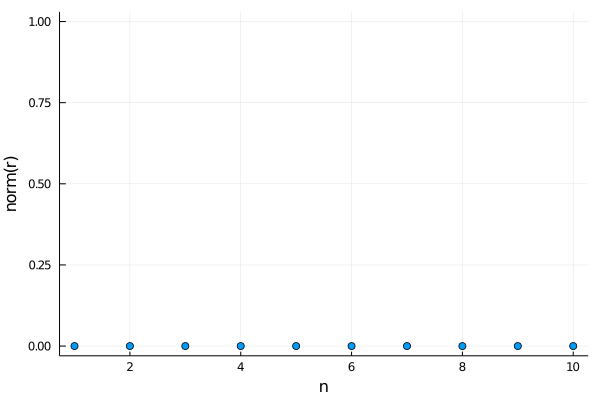

In [2]:
using LinearAlgebra, Plots

function test(n)
    L,U,p = lu(rand(n,n))
    r = norm(lowertriangularinverse(L)*L-I(n))
    if r<1e-10 r=0 end
    return r
end

scatter(1:10,test.(1:10), label=:false, xlabel="n", ylabel="norm(r)")

# Complexity

Three for loops are used for this implementation. Therefore the complexity is $O(N^3)$

## Adjourn

In [3]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/February/19 14:39"